In [1]:
import cPickle as pickle
import numpy as np
import os
import matplotlib.pyplot as plt

% matplotlib inline

In [5]:
pickleString = os.listdir('logls/')[1]
logl_raw = os.path.join('logls/', os.listdir('logls/')[1])
logl_raw 

IndexError: list index out of range

In [3]:
logl = np.loadtxt(logl_raw)

NameError: name 'logl_raw' is not defined

<matplotlib.colorbar.Colorbar instance at 0x108633a70>

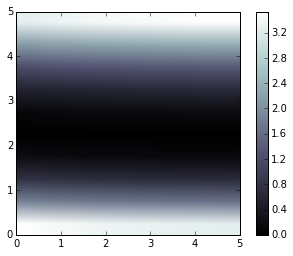

In [4]:
fig, ax = plt.subplots(1,1)

im = ax.imshow(logl[::-1]/np.median(logl), cmap=plt.cm.bone, extent=(0.0,5.0,0.0,5.0))
fig.colorbar(im)

In [5]:
filters = ['y4']

In [6]:
for f in filters:
    print f

y4


In [7]:
from __future__ import print_function

import os
import cPickle as pickle
import numpy as np


def pickle_results(filename=None, verbose=True):
    """Generator for decorator which allows pickling the results of a funcion
    Pickle is python's built-in object serialization.  This decorator, when
    used on a function, saves the results of the computation in the function
    to a pickle file.  If the function is called a second time with the
    same inputs, then the computation will not be repeated and the previous
    results will be used.
    This functionality is useful for computations which take a long time,
    but will need to be repeated (such as the first step of a data analysis).
    Parameters
    ----------
    filename : string (optional)
        pickle file to which results will be saved.
        If not specified, then the file is '<funcname>_output.pkl'
        where '<funcname>' is replaced by the name of the decorated function.
    verbose : boolean (optional)
        if True, then print a message to standard out specifying when the
        pickle file is written or read.
    Examples
    --------
    >>> @pickle_results('tmp.pkl', verbose=True)
    ... def f(x):
    ...     return x * x
    >>> f(4)
    @pickle_results: computing results and saving to 'tmp.pkl'
    16
    >>> f(4)
    @pickle_results: using precomputed results from 'tmp.pkl'
    16
    >>> f(6)
    @pickle_results: computing results and saving to 'tmp.pkl'
    36
    >>> import os; os.remove('tmp.pkl')
    """
    def pickle_func(f, filename=filename, verbose=verbose):
        if filename is None:
            filename = '%s_output.pkl' % f.__name__

        def new_f(*args, **kwargs):
            try:
                D = pickle.load(open(filename, 'rb'))
                cache_exists = True
            except:
                D = {}
                cache_exists = False

            # simple comparison doesn't work in the case of numpy arrays
            Dargs = D.get('args')
            Dkwargs = D.get('kwargs')

            try:
                args_match = (args == Dargs)
            except:
                args_match = np.all([np.all(a1 == a2)
                                     for (a1, a2) in zip(Dargs, args)])

            try:
                kwargs_match = (kwargs == Dkwargs)
            except:
                kwargs_match = ((sorted(Dkwargs.keys())
                                 == sorted(kwargs.keys()))
                                and (np.all([np.all(Dkwargs[key]
                                                    == kwargs[key])
                                             for key in kwargs])))

            if (type(D) == dict and D.get('funcname') == f.__name__
                    and args_match and kwargs_match):
                if verbose:
                    print("@pickle_results: using precomputed "
                          "results from '%s'" % filename)
                retval = D['retval']

            else:
                if verbose:
                    print("@pickle_results: computing results "
                          "and saving to '%s'" % filename)
                    if cache_exists:
                        print("  warning: cache file '%s' exists" % filename)
                        print("    - args match:   %s" % args_match)
                        print("    - kwargs match: %s" % kwargs_match)
                retval = f(*args, **kwargs)

                funcdict = dict(funcname=f.__name__, retval=retval,
                                args=args, kwargs=kwargs)
                with open(filename, 'wb') as outfile:
                    pickle.dump(funcdict, outfile)

            return retval
        return new_f
    return pickle_func

In [21]:
name = os.path.join('pickles/','test.pkl')
@pickle_results(name)
def testpickle(x,a,v,b):
    return x*a*v*b

In [22]:
testpickle(232,4232,1312,312)

@pickle_results: computing results and saving to 'pickles/test.pkl'


401903763456

In [18]:
pickle.load(open('test.pkl'))

{'args': (232, 4232, 1312, 312),
 'funcname': 'testpickle',
 'kwargs': {},
 'retval': 401903763456}

In [19]:
pickle.load(open('X22_P222343232117_H2O_Rayleigh_XSTD12_DG0_E5_galaxy_g_10b.pkl'))

{'args': ('H2O', 'Rayleigh', 'g'),
 'funcname': 'run_regression',
 'kwargs': {},
 'retval': (0.0,
  2.2222222222222223,
  array([[ -1.43550320e+11,  -7.81874560e+10,  -3.40671893e+10,
           -8.76507356e+09,   0.00000000e+00,  -5.66091037e+09,
           -2.38233044e+10,  -5.27570675e+10,  -9.09272702e+10,
           -1.36989570e+11],
         [ -1.44270236e+11,  -7.87768349e+10,  -3.44962257e+10,
           -8.99937645e+09,  -4.52161649e+04,  -5.38143630e+09,
           -2.32126417e+10,  -5.17563921e+10,  -8.94697666e+10,
           -1.34999494e+11],
         [ -1.44868811e+11,  -7.92662577e+10,  -3.48537450e+10,
           -9.19868110e+09,  -1.08270472e+07,  -5.16891241e+09,
           -2.27370292e+10,  -5.09723265e+10,  -8.83256545e+10,
           -1.33436790e+11],
         [ -1.45375887e+11,  -7.96797963e+10,  -3.51561685e+10,
           -9.36959916e+09,  -2.66777338e+07,  -5.00257579e+09,
           -2.23574058e+10,  -5.03438745e+10,  -8.74078780e+10,
           -1.32183670e+1

In [2]:
from AtmoBuilder import AtmoBuilder

In [3]:
ab = AtmoBuilder()

Found 16 MODTRAN files:
Pachon_MODTRAN.10.7sc
Pachon_MODTRAN.11.7sc
Pachon_MODTRAN.12.7sc
Pachon_MODTRAN.13.7sc
Pachon_MODTRAN.14.7sc
Pachon_MODTRAN.15.7sc
Pachon_MODTRAN.16.7sc
Pachon_MODTRAN.17.7sc
Pachon_MODTRAN.18.7sc
Pachon_MODTRAN.19.7sc
Pachon_MODTRAN.20.7sc
Pachon_MODTRAN.21.7sc
Pachon_MODTRAN.22.7sc
Pachon_MODTRAN.23.7sc
Pachon_MODTRAN.24.7sc
Pachon_MODTRAN.25.7sc
MODTRAN files have been read.

Read filter data from LSST software stack.
Filters: ['u', 'g', 'r', 'i', 'z', 'y4']
Read hardware data from LSST software stack.


In [4]:
ab.readAll()

# Read 988 MS stars from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/kurucz/
# Read 849 white dwarfs from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/wDs/
# Read 74 mlt stars from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/mlt/
# Generated 2520 galaxies at redshifts between 0.000000 and 3.000000
# Generated 76 quasars at redshifts between 0.000000 and 7.500000
# Generated 39 sn's at redshifts between 0.000000 and 1.200000 on days ['0', '20', '40']


In [5]:
atmo = ab.buildAtmo([2.2,2.3,4.3,2.3,2.1,1.7],2.2)

In [6]:
atmo.X, atmo.P, atmo.sb, atmo.aerosolNormWavelen

(2.2,
 [2.2, 2.3, 4.3, 2.3, 2.1, 1.7],
 array([  0.00000000e+00,   2.16056349e-15,   1.68497831e-14, ...,
          5.63020350e-01,   5.46204575e-01,   5.52876815e-01]),
 550.0)

Computing nonlinear regression for H2O and Rayleigh.
Observed atmosphere parameters: [2.2, 2.3, 4.3, 2.3, 2.1, 1.7]
Observed atmosphere airmass:    2.2
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for H2O: 2.2
Observed atmosphere parameter for Rayleigh: 2.3

Calculating best parameters for u filter...
@pickle_results: using precomputed results from 'pickles/X22_P222343232117_H2O_Rayleigh_XSTD12_DG0_E5_kurucz_u_10b.pkl'
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: using precomputed results from 'pickles/X22_P222343232117_H2O_Rayleigh_XSTD12_DG0_E5_kurucz_g_10b.pkl'
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: using precomputed results from 'pickles/X22_P222343232117_H2O_Rayleigh_XSTD12_DG0_E5_kurucz_r_10b.pkl'
Saved LogL for r filter.
Calculating best parameters for i filter...
@pickle_results: using precomputed results fro

/Users/joachim/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/Users/joachim/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


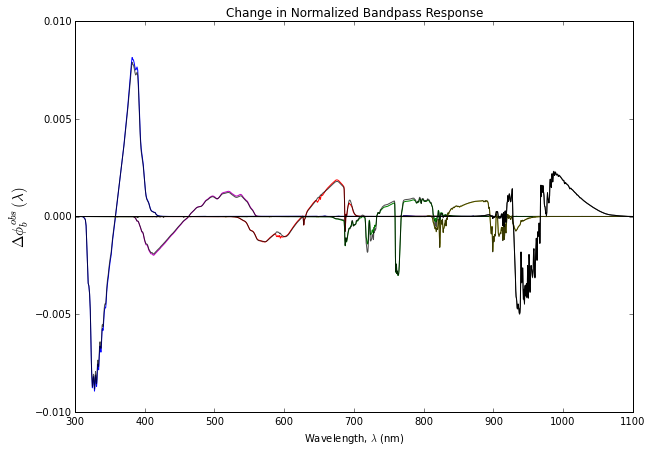

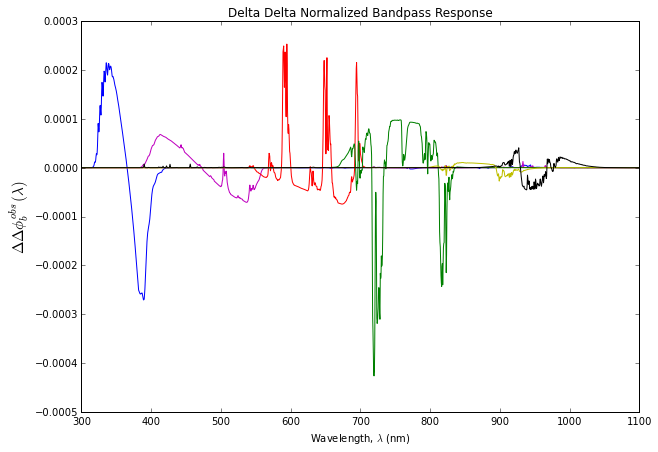

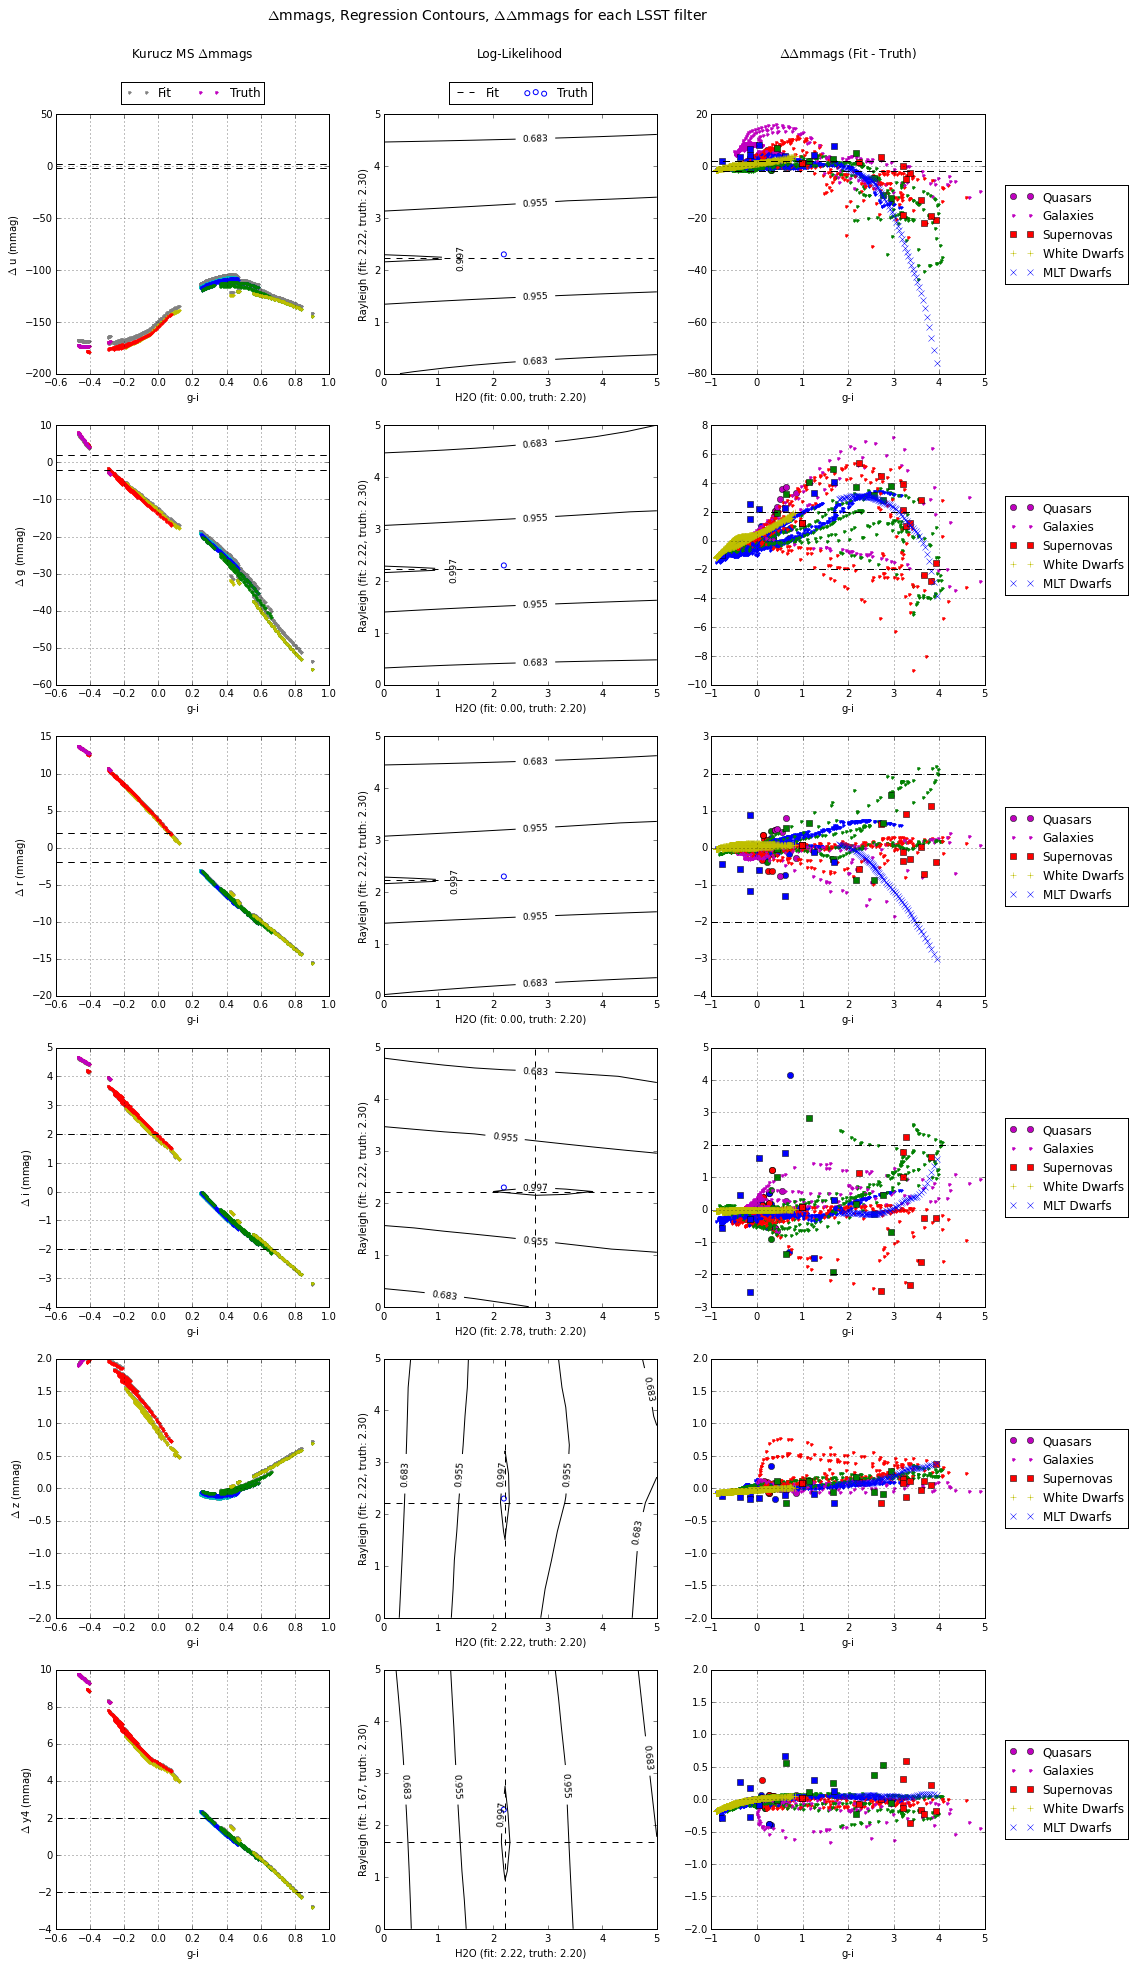

In [7]:
atmo = ab.buildAtmo([2.2,2.3,4.3,2.3,2.1,1.7],2.2)
a,b,c,d,e = ab.computeAtmoFit('H2O','Rayleigh',atmo,Nbins=10)

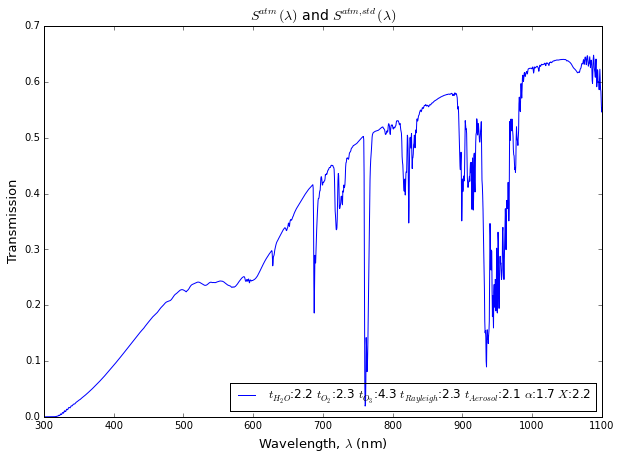

In [72]:
ab.transPlot(atmo)